In [11]:
!pip install python_bidi arabic_reshaper statsmodels

###فرضیه 1: میزان خلوص گاز تولید شده در پالایشگاه برابر با 95 درصد است

## :توضیحات مراحل آزمون فرضیه

1. تعریف فرضیه‌ها:
   - فرض صفر (H₀): μ = 95% (میزان خلوص گاز برابر با 95% است)
   - فرض مقابل (H₁): μ ≠ 95% (میزان خلوص گاز برابر با 95% نیست)

2. تولید داده‌های نمونه:
   - با استفاده از توزیع نرمال با میانگین 94.7% و انحراف معیار 1.2%
   - حجم نمونه: 30

3. محاسبه آماره آزمون:
   - استفاده از آزمون t یک نمونه‌ای (one-sample t-test)
   - محاسبه t-statistic و p-value

4. تصمیم‌گیری:
   - اگر p-value < α (0.05) → رد فرض صفر
   - اگر p-value ≥ α → عدم رد فرض صفر

5. تجسم نتایج:
   - هیستوگرام داده‌ها با خطوط میانگین ادعایی و میانگین نمونه
   - نمایش مناطق بحرانی
   - نمایش اطلاعات آماری (t-statistic، p-value، α)

6. تفسیر نتایج:
   - توضیح معنای آماری نتایج
   - نکات آموزشی درباره آزمون فرضیه

## :مفاهیم کلیدی

- سطح معنی‌داری (α): احتمال رد اشتباه فرض صفر (معمولاً 0.05)
- p-value: احتمال مشاهده داده‌های فعلی (یا شدیدتر) در صورت درست بودن فرض صفر
- آماره t: معیاری برای اندازه‌گیری اختلاف بین میانگین نمونه و مقدار ادعا شده
- منطقه بحرانی: مقادیری که اگر آماره آزمون در آن قرار گیرد، منجر به رد فرض صفر می‌شود

میانگین نمونه: 94.47%
انحراف معیار نمونه: 1.08%

آماره t: -2.6665
p-value: 0.0124


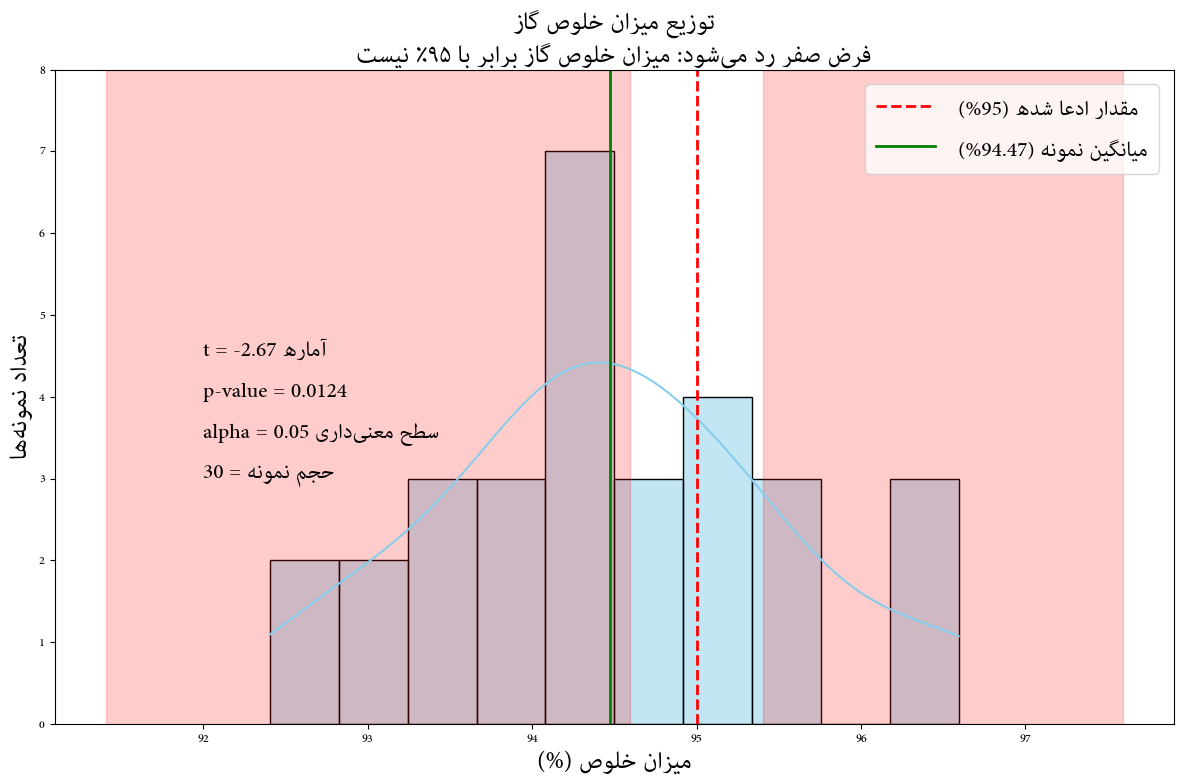


:تفسیر نتایج
فرض صفر رد می‌شود: میزان خلوص گاز برابر با ۹۵٪ نیست
→ (alpha=0.05) کمتر از سطح معنی‌داری p-value=(0.0124)
→ بنابراین فرض صفر رد می‌شود و نتیجه می‌گیریم که میانگین خلوص گاز برابر با 95% نیست
→ میانگین واقعی به احتمال زیاد نزدیک به 94.47% است

:نکات مهم
--------------------------------------------------
• یک نمونه‌ای زمانی استفاده می‌شود که می‌خواهیم میانگین جامعه را با یک مقدار مشخص مقایسه کنیم t آزمون
• بیانگر عدم تغییر یا وضعیت موجود است (H0) فرض صفر
• احتمال مشاهده نتایج حداقل به اندازه‌ی نمونه‌ی فعلی را نشان می‌دهد، در صورتی که فرض صفر درست باشد p-value
• احتمال خطای نوع اول را کنترل می‌کند (رد فرض صفر در حالی که درست است) (alpha) سطح معنی‌داری


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# 1. تنظیم فرضیه‌ها
# فرض صفر (H0): میانگین خلوص گاز = 95%
# فرض مقابل (H1): میانگین خلوص گاز ≠ 95%

# پارامترهای آزمون
mu0 = 95  # مقدار ادعا شده در فرض صفر
alpha = 0.05  # سطح معنی‌داری
sample_size = 30  # تعداد نمونه‌ها

# 2. تولید داده‌های نمونه
np.random.seed(42)  # برای تکرارپذیری نتایج

# تولید داده‌های نمونه با توزیع نرمال
# فرض: میانگین واقعی جامعه 94.7% و انحراف معیار 1.2%
true_mean = 94.7
true_std = 1.2
sample = np.random.normal(true_mean, true_std, sample_size)

# محاسبه آماره‌های نمونه
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # ddof=1 برای انحراف معیار نمونه‌ای
print(f"میانگین نمونه: {sample_mean:.2f}%")
print(f"انحراف معیار نمونه: {sample_std:.2f}%")

# 3. انجام آزمون t یک نمونه‌ای
t_stat, p_value = stats.ttest_1samp(sample, mu0)
print(f"\nآماره t: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. تصمیم‌گیری
if p_value < alpha:
    result = "فرض صفر رد می‌شود: میزان خلوص گاز برابر با ۹۵٪ نیست"
else:
    result = "فرض صفر رد نمی‌شود: شواهد کافی برای رد برابری خلوص با ۹۵٪ وجود ندارد"

# 5. تجسم نتایج
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Adobe Arabic'
plt.rcParams['font.size'] = 12

# هیستوگرام داده‌ها
sns.histplot(sample, kde=True, color='skyblue', bins=10)
plt.axvline(x=mu0, color='red', linestyle='--', linewidth=2, 
            label=bidi_text(f'مقدار ادعا شده ({mu0}%)'))
plt.axvline(x=sample_mean, color='green', linestyle='-', linewidth=2,
            label=bidi_text(f'میانگین نمونه ({sample_mean:.2f}%)'))

# تنظیمات نمودار
plt.title(bidi_text(f'توزیع میزان خلوص گاز\n{result}'), fontsize=24)
plt.xlabel(bidi_text('میزان خلوص (%)'), fontsize=24)
plt.ylabel(bidi_text('تعداد نمونه‌ها'), fontsize=24)
plt.legend(fontsize=21)

# نمایش منطقه بحرانی و p-value
x = np.linspace(min(sample)-1, max(sample)+1, 100)
t_dist = stats.t.pdf(x, df=sample_size-1, loc=mu0, scale=sample_std/np.sqrt(sample_size)) * 30

# محاسبه نقاط بحرانی
critical_value = stats.t.ppf(1 - alpha/2, df=sample_size-1)
lower_crit = mu0 - critical_value * (sample_std/np.sqrt(sample_size))
upper_crit = mu0 + critical_value * (sample_std/np.sqrt(sample_size))

# رسم منطقه بحرانی
plt.fill_betweenx(y=[0, 8], x1=min(x), x2=lower_crit, color='red', alpha=0.2,
                  label=bidi_text('منطقه بحرانی'))
plt.fill_betweenx(y=[0, 8], x1=upper_crit, x2=max(x), color='red', alpha=0.2)

# افزودن اطلاعات آماری
plt.text(92, 4.5, bidi_text(f'آماره t = {t_stat:.2f}'), fontsize=21)
plt.text(92, 4.0, bidi_text(f'p-value = {p_value:.4f}'), fontsize=21)
plt.text(92, 3.5, bidi_text(f'سطح معنی‌داری alpha = {alpha}'), fontsize=21)
plt.text(92, 3.0, bidi_text(f'حجم نمونه = {sample_size}'), fontsize=21)

plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('hypothesis_test_result.png', dpi=300)
plt.show()

# 6. تفسیر نتایج
print("\n" + "="*50)
print(":تفسیر نتایج")
print("="*50)
print(result)
if p_value < alpha:
    print(f"→ (alpha={alpha}) کمتر از سطح معنی‌داری p-value=({p_value:.4f})")
    print(f"→ بنابراین فرض صفر رد می‌شود و نتیجه می‌گیریم که میانگین خلوص گاز برابر با 95% نیست")
    print(f"→ میانگین واقعی به احتمال زیاد نزدیک به {sample_mean:.2f}% است")
else:
    print(f"→ p-value ({p_value:.4f}) بزرگ‌تر از سطح معنی‌داری (alpha={alpha}) است")
    print("→ بنابراین شواهد کافی برای رد فرض صفر وجود ندارد")
    print("→ این بدین معنا نیست که فرض صفر درست است، بلکه فقط شواهد کافی برای رد آن نداریم")

print("\n" + ":نکات مهم")
print("-" * 50)
print("• یک نمونه‌ای زمانی استفاده می‌شود که می‌خواهیم میانگین جامعه را با یک مقدار مشخص مقایسه کنیم t آزمون")
print("• بیانگر عدم تغییر یا وضعیت موجود است (H0) فرض صفر")
print("• احتمال مشاهده نتایج حداقل به اندازه‌ی نمونه‌ی فعلی را نشان می‌دهد، در صورتی که فرض صفر درست باشد p-value")
print("• احتمال خطای نوع اول را کنترل می‌کند (رد فرض صفر در حالی که درست است) (alpha) سطح معنی‌داری")

### فرضیه 2: میانگین زمان توقف در پالایشگاه برابر با 5 ساعت در ماه است

### توضیحات مثال جدید:

1. موضوع آزمون: بررسی ادعای "میانگین زمان توقف در پالایشگاه برابر با ۵ ساعت در ماه است"

2. فرضیه‌ها:
   - فرض صفر (H₀): μ = 5 ساعت
   - فرض مقابل (H₁): μ ≠ 5 ساعت

3. پارامترهای داده‌ها:
   - میانگین واقعی جامعه: 5.8 ساعت (فرضی)
   - انحراف معیار: 1.5 ساعت (فرضی)
   - حجم نمونه: 25 ماه (داده‌های ماهانه)

4. افزودنی‌های جدید در کد:
   - فاصله اطمینان: محاسبه فاصله اطمینان 95% برای میانگین واقعی
   - تحلیل قدرت آزمون: محاسبه قدرت آزمون (power analysis)
   - اندازه اثر: محاسبه اندازه اثر (effect size)

### نکات آموزشی جدید در این مثال:

1. فاصله اطمینان:
   - محدوده‌ای که با احتمال مشخص (95%) میانگین واقعی جامعه را در بر می‌گیرد
   - محاسبه شده با استفاده از توزیع t و خطای استاندارد

2. قدرت آزمون (Power):
   - احتمال رد صحیح فرض صفر زمانی که نادرست است
   - مقدار مطلوب معمولاً 0.8 یا بیشتر است
   - به حجم نمونه، اندازه اثر و سطح معنی‌داری بستگی دارد

3. اندازه اثر (Effect Size):
   - معیاری استاندارد شده برای اندازه‌گیری بزرگی تفاوت
   - در اینجا از d کوهن استفاده شده: (میانگین نمونه - مقدار ادعا شده) / انحراف معیار

4. خطای نوع دوم:
   - زمانی رخ می‌دهد که فرض صفر نادرست باشد، اما ما آن را رد نکنیم
   - با افزایش حجم نمونه می‌توان قدرت آزمون را افزایش داد

میانگین نمونه: 6.01 ساعت
انحراف معیار نمونه: 1.85 ساعت

آماره t: 2.7338
p-value: 0.0116


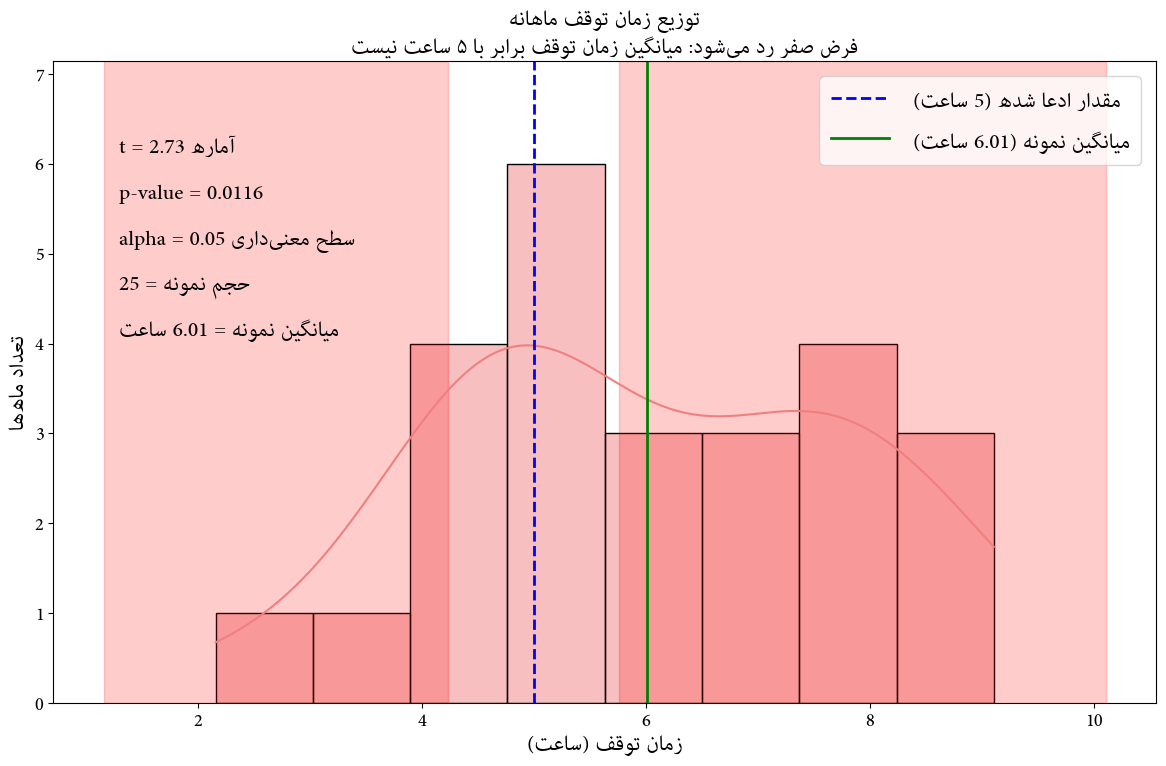


:تفسیر نتایج
فرض صفر رد می‌شود: میانگین زمان توقف برابر با ۵ ساعت نیست
→ (alpha=0.05) کمتر از سطح معنی‌داری p-value=(0.0116)
→ بنابراین فرض صفر رد می‌شود و نتیجه می‌گیریم که میانگین زمان توقف برابر با 5 ساعت نیست
→ میانگین واقعی به احتمال زیاد نزدیک به 6.01 ساعت است

:فاصله اطمینان %95
→ فاصله اطمینان: (5.25, 6.77) ساعت
→ این بدان معناست که با اطمینان 95%، میانگین واقعی زمان توقف بین 5.25 تا 6.77 ساعت است

:تحلیل قدرت آزمون
→ اندازه اثر: 0.55
→ قدرت آزمون: 0.75
→ قدرت آزمون احتمال تشخیص تفاوت واقعی زمانی است که وجود داشته باشد
→ هشدار: قدرت آزمون کمتر از 0.8 است، ممکن است خطای نوع دوم رخ داده باشد
→ پیشنهاد: افزایش حجم نمونه برای افزایش قدرت آزمون
→ حجم نمونه پیشنهادی برای قدرت 0.8: 29


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# 1. تنظیم فرضیه‌ها
# فرض صفر (H0): میانگین زمان توقف = 5 ساعت
# فرض مقابل (H1): میانگین زمان توقف ≠ 5 ساعت

# پارامترهای آزمون
mu0 = 5  # مقدار ادعا شده در فرض صفر
alpha = 0.05  # سطح معنی‌داری
sample_size = 25  # تعداد نمونه‌ها (25 ماه)

mm = sample_size/3.5
# 2. تولید داده‌های نمونه
np.random.seed(123)  # برای تکرارپذیری نتایج

# تولید داده‌های نمونه با توزیع نرمال
# فرض: میانگین واقعی جامعه 5.8 ساعت و انحراف معیار 1.5 ساعت
true_mean = 5.8
true_std = 1.5
sample = np.random.normal(true_mean, true_std, sample_size)

# محاسبه آماره‌های نمونه
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # ddof=1 برای انحراف معیار نمونه‌ای
print(f"میانگین نمونه: {sample_mean:.2f} ساعت")
print(f"انحراف معیار نمونه: {sample_std:.2f} ساعت")

# 3. انجام آزمون t یک نمونه‌ای
t_stat, p_value = stats.ttest_1samp(sample, mu0)
print(f"\nآماره t: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. تصمیم‌گیری
if p_value < alpha:
    result = "فرض صفر رد می‌شود: میانگین زمان توقف برابر با ۵ ساعت نیست"
else:
    result = "فرض صفر رد نمی‌شود: شواهد کافی برای رد برابری زمان توقف با ۵ ساعت وجود ندارد"

# 5. تجسم نتایج
plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Adobe Arabic'
plt.rcParams['font.size'] = 18

# هیستوگرام داده‌ها
sns.histplot(sample, kde=True, color='lightcoral', bins=8)
plt.axvline(x=mu0, color='blue', linestyle='--', linewidth=2, 
            label=bidi_text(f'مقدار ادعا شده ({mu0} ساعت)'))
plt.axvline(x=sample_mean, color='green', linestyle='-', linewidth=2,
            label=bidi_text(f'میانگین نمونه ({sample_mean:.2f} ساعت)'))

# تنظیمات نمودار
plt.title(bidi_text(f'توزیع زمان توقف ماهانه\n{result}'), fontsize=21)
plt.xlabel(bidi_text('زمان توقف (ساعت)'), fontsize=21)
plt.ylabel(bidi_text('تعداد ماه‌ها'), fontsize=21)
plt.legend(fontsize=21)

# محاسبه نقاط بحرانی
critical_value = stats.t.ppf(1 - alpha/2, df=sample_size-1)
lower_crit = mu0 - critical_value * (sample_std/np.sqrt(sample_size))
upper_crit = mu0 + critical_value * (sample_std/np.sqrt(sample_size))

# رسم منطقه بحرانی
x = np.linspace(min(sample)-1, max(sample)+1, 100)
plt.fill_betweenx(y=[0, mm], x1=min(x), x2=lower_crit, color='red', alpha=0.2,
                  label=bidi_text('منطقه بحرانی'))
plt.fill_betweenx(y=[0, mm], x1=upper_crit, x2=max(x), color='red', alpha=0.2)

# افزودن اطلاعات آماری
plt.text(1.3, mm-mm/7, bidi_text(f'آماره t = {t_stat:.2f}'), fontsize=21)
plt.text(1.3, mm-1.5*mm/7, bidi_text(f'p-value = {p_value:.4f}'), fontsize=21)
plt.text(1.3, mm-2*mm/7, bidi_text(f'سطح معنی‌داری alpha = {alpha}'), fontsize=21)
plt.text(1.3, mm-2.5*mm/7, bidi_text(f'حجم نمونه = {sample_size}'), fontsize=21)
plt.text(1.3, mm-3*mm/7, bidi_text(f'میانگین نمونه = {sample_mean:.2f} ساعت'), fontsize=21)

plt.ylim(0, mm)
plt.tight_layout()
plt.savefig('downtime_hypothesis_test.png', dpi=300)
plt.show()

# 6. تفسیر نتایج
print("\n" + "="*50)
print(":تفسیر نتایج")
print("="*50)
print(result)
if p_value < alpha:
    print(f"→ (alpha={alpha}) کمتر از سطح معنی‌داری p-value=({p_value:.4f})")
    print(f"→ بنابراین فرض صفر رد می‌شود و نتیجه می‌گیریم که میانگین زمان توقف برابر با 5 ساعت نیست")
    print(f"→ میانگین واقعی به احتمال زیاد نزدیک به {sample_mean:.2f} ساعت است")
else:
    print(f"→ (alpha={alpha}) بزرگ‌تر از سطح معنی‌داری p-value=({p_value:.4f})")
    print("→ بنابراین شواهد کافی برای رد فرض صفر وجود ندارد")
    print("→ این بدین معنا نیست که فرض صفر درست است، بلکه فقط شواهد کافی برای رد آن نداریم")

# 7. محاسبه فاصله اطمینان 95%
confidence_level = 0.95
dof = sample_size - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, dof)
margin_error = t_critical * (sample_std / np.sqrt(sample_size))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error
print("\n" + "="*50)
print(":فاصله اطمینان %95")
print("="*50)
print(f"→ فاصله اطمینان: ({ci_lower:.2f}, {ci_upper:.2f}) ساعت")
print(f"→ این بدان معناست که با اطمینان 95%، میانگین واقعی زمان توقف بین {ci_lower:.2f} تا {ci_upper:.2f} ساعت است")


# 8. تحلیل قدرت آزمون (با استفاده از statsmodels)
try:
    from statsmodels.stats.power import TTestPower
    # محاسبه اندازه اثر
    effect_size = (sample_mean - mu0) / sample_std
    
    # ایجاد ابزار محاسبه قدرت آزمون
    power_analyzer = TTestPower()
    
    # محاسبه قدرت آزمون برای آزمون دوطرفه
    power = power_analyzer.power(
        effect_size=abs(effect_size),  # قدرمطلق برای دوطرفه
        nobs=sample_size,
        alpha=alpha,
        alternative='two-sided'
    )
    
    print("\n" + "="*50)
    print(":تحلیل قدرت آزمون")
    print("="*50)
    print(f"→ اندازه اثر: {effect_size:.2f}")
    print(f"→ قدرت آزمون: {power:.2f}")
    print("→ قدرت آزمون احتمال تشخیص تفاوت واقعی زمانی است که وجود داشته باشد")
    
    if power < 0.8:
        print("→ هشدار: قدرت آزمون کمتر از 0.8 است، ممکن است خطای نوع دوم رخ داده باشد")
        print("→ پیشنهاد: افزایش حجم نمونه برای افزایش قدرت آزمون")
        
        # محاسبه حجم نمونه لازم برای قدرت 0.8
        required_n = power_analyzer.solve_power(
            effect_size=abs(effect_size),
            alpha=alpha,
            power=0.8,
            alternative='two-sided'
        )
        print(f"→ حجم نمونه پیشنهادی برای قدرت 0.8: {int(np.ceil(required_n))}")
    
except ImportError:
    print("\n" + "="*50)
    print("برای تحلیل قدرت آزمون نیاز به نصب statsmodels دارید")
    print(":لطفا با دستور زیر آن را نصب کنید")
    print("pip install statsmodels")

### فرضیه 3: میانگین مصرف انرژی در دو واحد مختلف پالایشگاه برابر است

### توضیحات مراحل آزمون:

1. فرضیه‌ها:
   - H₀: μ_A = μ_B (میانگین مصرف انرژی در دو واحد برابر است)
   - H₁: μ_A ≠ μ_B (میانگین مصرف انرژی در دو واحد برابر نیست)

2. تولید داده‌ها:
   - واحد A: میانگین 8500 kWh، انحراف معیار 250 kWh، 30 نمونه
   - واحد B: میانگین 8800 kWh، انحراف معیار 300 kWh، 35 نمونه

3. آزمون‌های آماری:
   - آزمون Levene: برای بررسی برابری واریانس‌ها
   - آزمون t دو نمونه: با در نظر گرفتن نتیجه آزمون Levene
   
4. تصمیم‌گیری:
   - بر اساس p-value و سطح معنی‌داری (α=0.05)

5. تجسم نتایج:
   - نمودار جعبه‌ای (Boxplot): برای مقایسه توزیع مصرف انرژی
   - نمودار ویولین (Violin Plot): برای نمایش تراکم توزیع
   - نمایش اطلاعات آماری در پایین نمودار

6. تحلیل‌های تکمیلی:
   - فاصله اطمینان برای تفاوت میانگین‌ها
   - تحلیل قدرت آزمون (Power Analysis)
   - تحلیل اقتصادی پیامدهای نتایج

### مفاهیم کلیدی در این مثال:

1. آزمون t دو نمونه مستقل:
   - برای مقایسه میانگین دو گروه مستقل استفاده می‌شود
   - نیاز به بررسی برابری واریانس‌ها دارد (آزمون Levene)

2. اندازه اثر (Effect Size):
   - از d کوهن استفاده شده: (میانگین1 - میانگین2) / انحراف معیار ترکیبی
   - معیاری برای اندازه‌گیری بزرگی تفاوت بین دو گروه

3. فاصله اطمینان برای تفاوت میانگین‌ها:
   - اگر شامل صفر باشد، تفاوت معنی‌دار نیست
   - اگر شامل صفر نباشد، تفاوت معنی‌دار است

4. تحلیل قدرت آزمون:
   - احتمال تشخیص تفاوت واقعی زمانی که وجود دارد
   - حجم نمونه لازم برای رسیدن به قدرت مطلوب (0.8)

5. تحلیل اقتصادی:
   - تبدیل نتایج آماری به پیامدهای مالی
   - کمک به تصمیم‌گیری مدیریتی بر اساس نتایج

### نکات آموزشی:

1. اهمیت آزمون برابری واریانس‌ها:
   - اگر واریانس‌ها برابر نباشند، باید از نسخه Welch آزمون t استفاده کنیم (equal_var=False)
   - این کار دقت نتایج آزمون را افزایش می‌دهد

2. انتخاب حجم نمونه:
   - حجم نمونه بر دقت آزمون و قدرت آن تأثیر مستقیم دارد
   - برای تفاوت‌های کوچک، نیاز به حجم نمونه بزرگتری داریم

3. نمودارهای مقایسه‌ای:
   - نمودار جعبه‌ای: مقایسه میانه، چارک‌ها و نقاط پرت
   - نمودار ویولین: نمایش تراکم توزیع داده‌ها

4. تبدیل نتایج آماری به تصمیم‌های عملیاتی:
   - تحلیل اقتصادی به تصمیم‌گیرندگان کمک می‌کند اهمیت نتایج را درک کنند
   - تفاوت‌های معنی‌دار می‌تواند پیامدهای مالی قابل توجهی داشته باشد

واحد A: میانگین = 8452.96 kWh, انحراف معیار = 225.00
واحد B: میانگین = 8750.37 kWh, انحراف معیار = 273.23

آزمون Levene برای برابری واریانس‌ها: p-value = 0.1623

آزمون t دو نمونه (با فرض برابری واریانس‌ها):
آماره t: -4.7401
p-value: 0.0000


C:\Users\Maadar-ASUS\AppData\Local\Temp\ipykernel_516\3155834513.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Maadar-ASUS\AppData\Local\Temp\ipykernel_516\3155834513.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Figure size 1400x800 with 0 Axes>

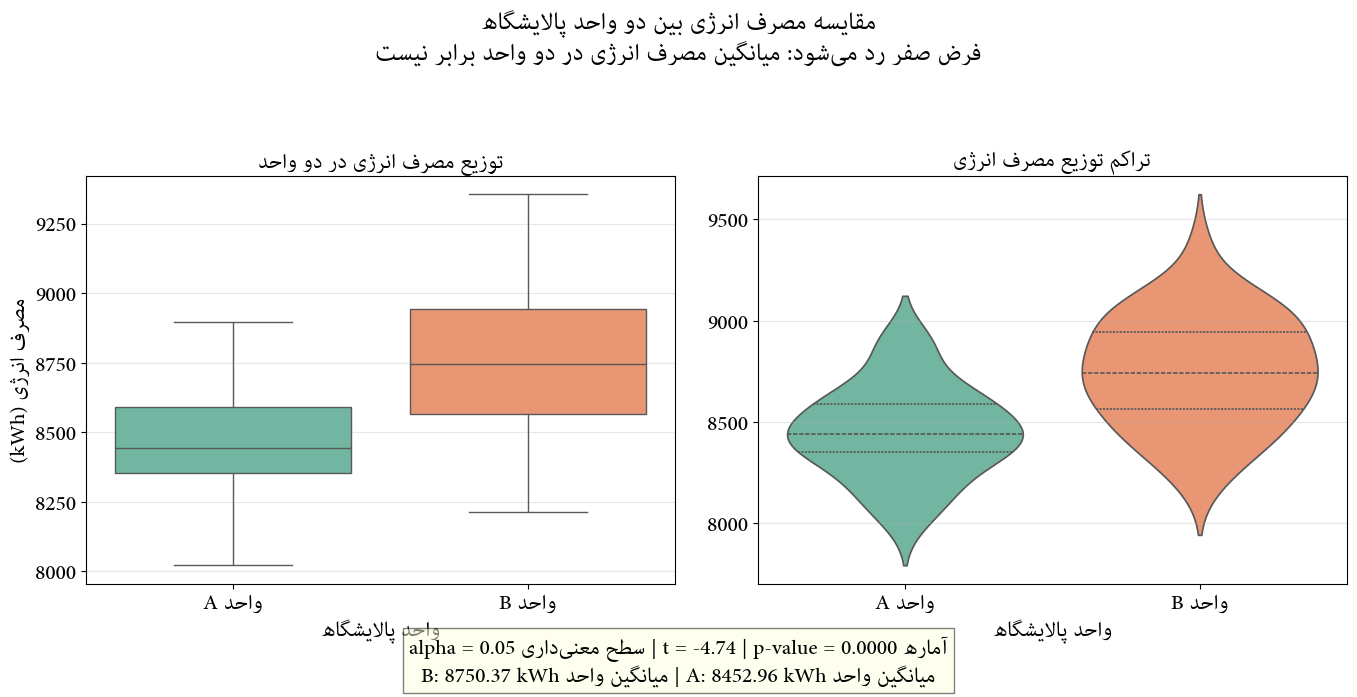


:فاصله اطمینان 95% برای تفاوت میانگین‌ها
→ تفاوت میانگین (A - B): -297.41 kWh
→ فاصله اطمینان: (-420.93, -173.89) kWh
→ فاصله اطمینان شامل صفر نمی‌شود، بنابراین تفاوت معنی‌داری بین میانگین‌ها وجود دارد

:تحلیل قدرت آزمون
→ اندازه اثر (d کوهن): 1.18
→ قدرت آزمون: 1.00
→ قدرت آزمون احتمال تشخیص تفاوت واقعی زمانی است که وجود داشته باشد

:تحلیل اقتصادی
→ تفاوت میانگین مصرف انرژی: 297.41 kWh در روز
→ تفاوت سالانه: 108554.84 kWh
→ با فرض قیمت 0.1 دلار به ازای هر kWh:
→ هزینه اضافی سالانه: $10,855.48
→ با توجه به تفاوت معنی‌دار، بررسی علل این تفاوت و اجرای اقدامات اصلاحی توصیه می‌شود


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import pandas as pd
from statsmodels.stats.power import TTestIndPower

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# 1. تنظیم فرضیه‌ها
# فرض صفر (H0): میانگین مصرف انرژی در واحد A = میانگین مصرف انرژی در واحد B
# فرض مقابل (H1): میانگین مصرف انرژی در واحد A ≠ میانگین مصرف انرژی در واحد B
# جفتی استفاده شودt باید از آزمون
# پارامترهای آزمون
alpha = 0.05  # سطح معنی‌داری

# 2. تولید داده‌های نمونه برای دو واحد پالایشگاه
np.random.seed(42)  # برای تکرارپذیری نتایج

# تولید داده‌های واحد A
mean_A = 8500  # میانگین مصرف انرژی واحد A (kWh)
std_A = 250    # انحراف معیار واحد A
n_A = 30       # تعداد نمونه‌ها در واحد A
unit_A = np.random.normal(mean_A, std_A, n_A)

# تولید داده‌های واحد B
mean_B = 8800  # میانگین مصرف انرژی واحد B (kWh)
std_B = 300    # انحراف معیار واحد B
n_B = 35       # تعداد نمونه‌ها در واحد B
unit_B = np.random.normal(mean_B, std_B, n_B)

# محاسبه آماره‌های نمونه
mean_unit_A = np.mean(unit_A)
std_unit_A = np.std(unit_A, ddof=1)
mean_unit_B = np.mean(unit_B)
std_unit_B = np.std(unit_B, ddof=1)

print(f"واحد A: میانگین = {mean_unit_A:.2f} kWh, انحراف معیار = {std_unit_A:.2f}")
print(f"واحد B: میانگین = {mean_unit_B:.2f} kWh, انحراف معیار = {std_unit_B:.2f}")

# 3. انجام آزمون t دو نمونه مستقل
# ابتدا آزمون Levene برای بررسی برابری واریانس‌ها
levene_test = stats.levene(unit_A, unit_B)
print(f"\nآزمون Levene برای برابری واریانس‌ها: p-value = {levene_test.pvalue:.4f}")

# تصمیم گیری درباره برابری واریانس‌ها
if levene_test.pvalue > alpha:
    equal_var = True
    var_text = "با فرض برابری واریانس‌ها"
else:
    equal_var = False
    var_text = "بدون فرض برابری واریانس‌ها"

# انجام آزمون t دو نمونه
t_stat, p_value = stats.ttest_ind(unit_A, unit_B, equal_var=equal_var)
print(f"\nآزمون t دو نمونه ({var_text}):")
print(f"آماره t: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. تصمیم‌گیری
if p_value < alpha:
    result = "فرض صفر رد می‌شود: میانگین مصرف انرژی در دو واحد برابر نیست"
else:
    result = "فرض صفر رد نمی‌شود: شواهد کافی برای رد برابری میانگین مصرف انرژی وجود ندارد"

# 5. تجسم نتایج
plt.figure(figsize=(14, 8))
plt.rcParams['font.family'] = 'Adobe Arabic'
plt.rcParams['font.size'] = 21

# ایجاد DataFrame برای استفاده با seaborn
data = pd.DataFrame({
    'مصرف انرژی (kWh)': np.concatenate([unit_A, unit_B]),
    'واحد': [bidi_text('واحد A')] * n_A + [bidi_text('واحد B')] * n_B
})

# ایجاد یک نمودار با دو زیرنمودار
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# نمودار جعبه‌ای (Boxplot)
sns.boxplot(
    x='واحد', 
    y='مصرف انرژی (kWh)', 
    data=data, 
    palette='Set2',
    ax=ax1
)
ax1.set_title(bidi_text('توزیع مصرف انرژی در دو واحد'), fontsize=21)
ax1.set_xlabel(bidi_text('واحد پالایشگاه'), fontsize=21)
ax1.set_ylabel(bidi_text('مصرف انرژی (kWh)'), fontsize=21)
ax1.grid(axis='y', alpha=0.3)

# نمودار ویولین (Violin Plot)
sns.violinplot(
    x='واحد', 
    y='مصرف انرژی (kWh)', 
    data=data, 
    palette='Set2', 
    inner='quartile',
    ax=ax2
)
ax2.set_title(bidi_text('تراکم توزیع مصرف انرژی'), fontsize=21)
ax2.set_xlabel(bidi_text('واحد پالایشگاه'), fontsize=21)
ax2.set_ylabel('')  # حذف برچسب تکراری محور عمودی
ax2.grid(axis='y', alpha=0.3)

# افزودن عنوان اصلی
plt.suptitle(bidi_text(f'مقایسه مصرف انرژی بین دو واحد پالایشگاه\n{result}'), fontsize=24, y=0.98)

# افزودن اطلاعات آماری
plt.figtext(0.5, 0.02, 
            bidi_text(f'آماره t = {t_stat:.2f} | p-value = {p_value:.4f} | سطح معنی‌داری alpha = {alpha}') + "\n" +
            bidi_text(f'میانگین واحد A: {mean_unit_A:.2f} kWh | میانگین واحد B: {mean_unit_B:.2f} kWh'),
            ha='center', fontsize=21, bbox=dict(facecolor='lightyellow', alpha=0.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('energy_comparison_test.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. محاسبه فاصله اطمینان 95% برای تفاوت میانگین‌ها
dof = n_A + n_B - 2
t_critical = stats.t.ppf(0.975, dof)
mean_diff = mean_unit_A - mean_unit_B
std_diff = np.sqrt((std_unit_A**2 / n_A) + (std_unit_B**2 / n_B))
ci_lower = mean_diff - t_critical * std_diff
ci_upper = mean_diff + t_critical * std_diff
print("\n" + "="*50)
print(":فاصله اطمینان 95% برای تفاوت میانگین‌ها")
print("="*50)
print(f"→ تفاوت میانگین (A - B): {mean_diff:.2f} kWh")
print(f"→ فاصله اطمینان: ({ci_lower:.2f}, {ci_upper:.2f}) kWh")
if ci_lower < 0 < ci_upper:
    print("→ از آنجایی که فاصله اطمینان شامل صفر می‌شود، تفاوت معنی‌داری بین میانگین‌ها وجود ندارد")
else:
    print("→ فاصله اطمینان شامل صفر نمی‌شود، بنابراین تفاوت معنی‌داری بین میانگین‌ها وجود دارد")

# 7. تحلیل قدرت آزمون
effect_size = (mean_unit_A - mean_unit_B) / np.sqrt(((n_A-1)*std_unit_A**2 + (n_B-1)*std_unit_B**2) / (n_A + n_B - 2))

# محاسبه قدرت آزمون
power_analyzer = TTestIndPower()
power = power_analyzer.power(
    effect_size=abs(effect_size),
    nobs1=n_A,
    ratio=n_B/n_A,
    alpha=alpha,
    alternative='two-sided'
)

print("\n" + "="*50)
print(":تحلیل قدرت آزمون")
print("="*50)
print(f"→ اندازه اثر (d کوهن): {abs(effect_size):.2f}")
print(f"→ قدرت آزمون: {power:.2f}")
print("→ قدرت آزمون احتمال تشخیص تفاوت واقعی زمانی است که وجود داشته باشد")

if power < 0.8:
    print("→ هشدار: قدرت آزمون کمتر از 0.8 است، ممکن است خطای نوع دوم رخ داده باشد")
    
    # محاسبه حجم نمونه لازم برای قدرت 0.8
    required_n = power_analyzer.solve_power(
        effect_size=abs(effect_size),
        alpha=alpha,
        power=0.8,
        ratio=1,
        alternative='two-sided'
    )
    print(f"→ حجم نمونه پیشنهادی برای قدرت 0.8: {int(np.ceil(required_n))} در هر گروه")

# 8. تحلیل اقتصادی
energy_diff = abs(mean_unit_B - mean_unit_A)
print("\n" + "="*50)
print(":تحلیل اقتصادی")
print("="*50)
print(f"→ تفاوت میانگین مصرف انرژی: {energy_diff:.2f} kWh در روز")
print(f"→ تفاوت سالانه: {energy_diff * 365:.2f} kWh")
print("→ با فرض قیمت 0.1 دلار به ازای هر kWh:")
print(f"→ هزینه اضافی سالانه: ${energy_diff * 365 * 0.1:,.2f}")

if p_value < alpha:
    print("→ با توجه به تفاوت معنی‌دار، بررسی علل این تفاوت و اجرای اقدامات اصلاحی توصیه می‌شود")
else:
    print("→ با توجه به عدم تفاوت معنی‌دار، تمرکز بر بهینه‌سازی کلی مصرف انرژی توصیه می‌شود")

### فرضیه 3: یک بهینه سازی جدید در فرآیند پالایشگاه باعث کاهش مصرف برق شده است

### توضیحات مراحل آزمون:

1. فرضیه‌ها:
   - H₀: μ_before = μ_after (بهینه‌سازی تأثیری نداشته است)
   - H₁: μ_before > μ_after (بهینه‌سازی باعث کاهش مصرف شده است)

2. طرح آزمون:
   - آزمون t زوجی (Paired t-test)
   - یک طرفه (one-tailed) زیرا جهت تغییر مشخص است (کاهش مصرف)

3. تولید داده‌ها:
   - 30 روز داده قبل و بعد از بهینه‌سازی
   - کاهش فرضی 5% در مصرف انرژی
   - کاهش تغییرپذیری پس از بهینه‌سازی

4. تحلیل نتایج:
   - محاسبه تفاوت‌های زوجی (قبل - بعد)
   - آزمون t زوجی با جهت‌گیری "greater" (آیا قبل > بعد است؟)

### تجسم نتایج:

1. نمودار خطی مقایسه مصرف:
   - خط قرمز: مصرف قبل از بهینه‌سازی
   - خط سبز: مصرف بعد از بهینه‌سازی
   - منطقه سبز: میزان کاهش مصرف

2. نمودار میله‌ای درصد کاهش:
   - درصد کاهش مصرف برای هر روز
   - خط چین قرمز: میانگین درصد کاهش

### تحلیل‌های تکمیلی:

1. فاصله اطمینان:
   - فاصله اطمینان 95% برای میانگین کاهش مصرف
   - اگر شامل صفر نباشد، کاهش معنی‌دار است

2. تحلیل اقتصادی:
   - محاسبه صرفه‌جویی روزانه و سالانه
   - تبدیل به ارزش مالی با نرخ دلاری
   - توصیه‌های مدیریتی بر اساس نتایج

### نکات کلیدی:

1. آزمون t زوجی:
   - مناسب برای داده‌های وابسته (همان واحدها قبل و بعد)
   - حساسیت بیشتری نسبت به آزمون مستقل دارد

2. جهت‌گیری آزمون:
   - در اینجا از آزمون یک طرفه استفاده شده زیرا فقط کاهش مصرف مورد نظر است
   - اگر جهت تغییر نامشخص بود، از آزمون دو طرفه استفاده می‌شد

3. تحلیل اقتصادی:
   - تبدیل نتایج آماری به ارزش مالی
   - کمک به تصمیم‌گیری درباره توجیه‌پذیری اجرای بهینه‌سازی

4. نمودارهای اطلاعاتی:
   - نمودار خطی: روند تغییرات در طول زمان
   - نمودار میله‌ای: جزئیات کاهش برای هر روز
   - خط میانگین: معیار کلی کاهش

میانگین مصرف قبل: 8424.74 مگاوات-ساعت
میانگین مصرف بعد: 8032.59 مگاوات-ساعت
میانگین کاهش مصرف: 392.15 مگاوات-ساعت
انحراف معیار کاهش: 461.10

آماره t: 4.6582
p-value: 0.0000


C:\Users\Maadar-ASUS\AppData\Local\Temp\ipykernel_516\3888757560.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='روز', y='کاهش درصدی', palette='viridis', alpha=0.8)


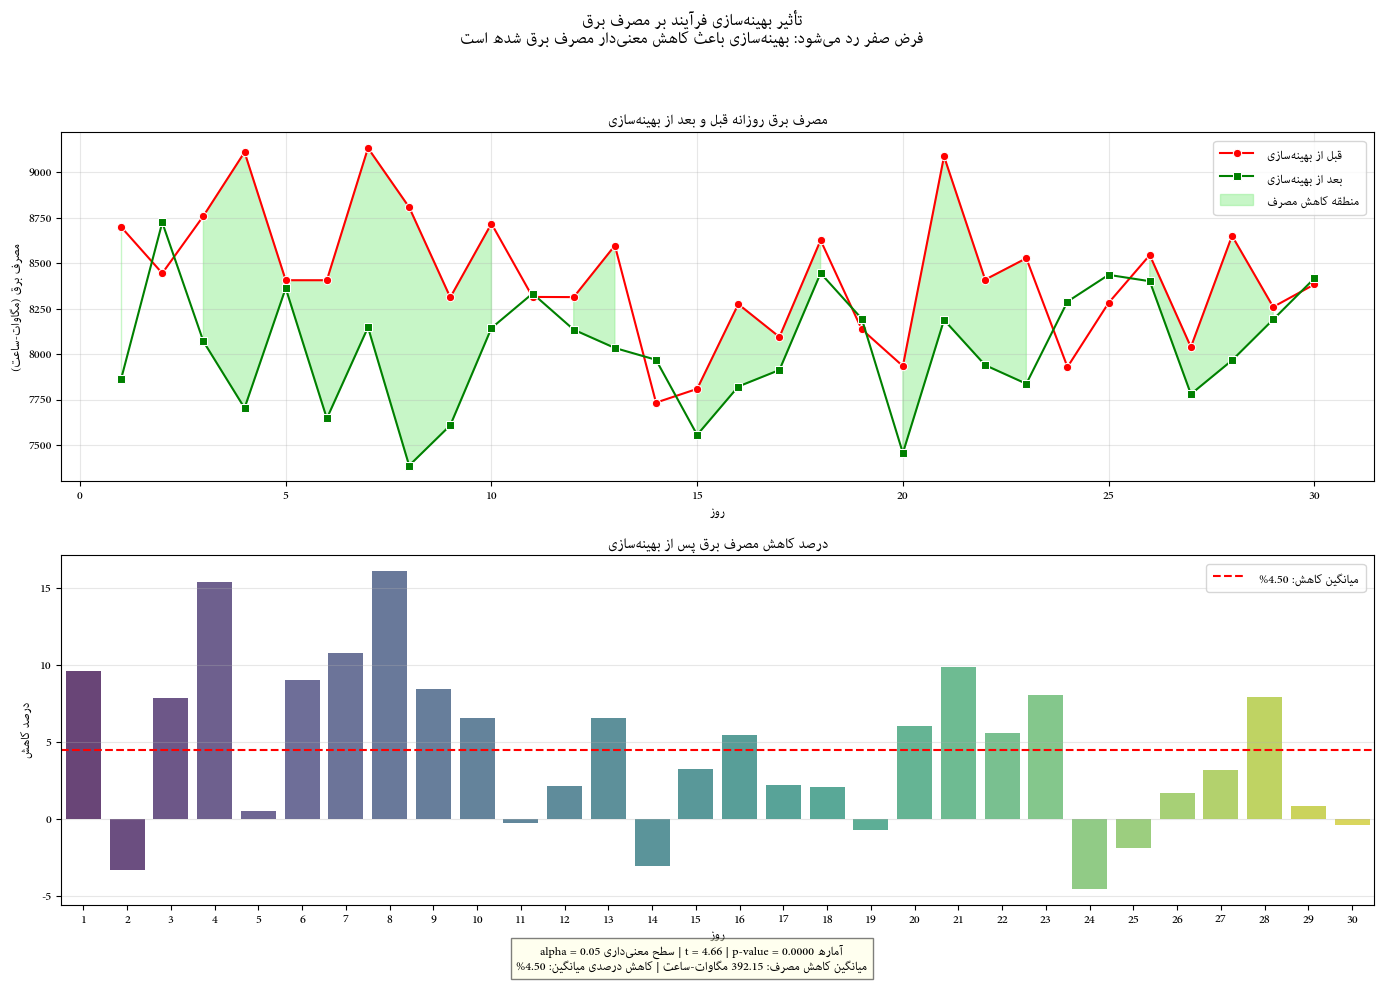


:فاصله اطمینان 95% برای میانگین کاهش مصرف
→ فاصله اطمینان: (219.97, 564.33) مگاوات-ساعت

:تحلیل اقتصادی
→ کاهش روزانه: 392.15 مگاوات-ساعت
→ کاهش سالانه: 143134.06 مگاوات-ساعت
→ صرفه‌جویی سالانه (با نرخ 100 دلار به ازای هر MWh): $14,313,405.88
→ با توجه به کاهش معنی‌دار، بهینه‌سازی موفقیت‌آمیز بوده است
→ بازگشت سرمایه: تحلیل هزینه-فایده اجرای بهینه‌سازی توصیه می‌شود


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import pandas as pd

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# 1. تنظیم فرضیه‌ها
# فرض صفر (H0): بهینه‌سازی تأثیری نداشته است (مصرف برق قبل و بعد برابر است)
# فرض مقابل (H1): بهینه‌سازی باعث کاهش مصرف برق شده است (مصرف بعد کمتر از قبل است)
# جفتی استفاده شودt باید از آزمون

# پارامترهای آزمون
alpha = 0.05  # سطح معنی‌داری

# 2. تولید داده‌های نمونه
np.random.seed(42)  # برای تکرارپذیری نتایج

# تولید داده‌های مصرف برق قبل از بهینه‌سازی (مگاوات-ساعت)
n = 30  # تعداد روزهای نمونه‌برداری
mean_before = 8500  # میانگین مصرف قبل
std_before = 400    # انحراف معیار قبل
power_before = np.random.normal(mean_before, std_before, n)

# تولید داده‌های مصرف برق بعد از بهینه‌سازی
# فرض: کاهش 5% در مصرف برق
mean_after = mean_before * 0.95
std_after = 350  # کاهش تغییرپذیری پس از بهینه‌سازی
power_after = np.random.normal(mean_after, std_after, n)

# محاسبه تفاوت‌ها
differences = power_before - power_after

# محاسبه آماره‌های نمونه
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
print(f"میانگین مصرف قبل: {np.mean(power_before):.2f} مگاوات-ساعت")
print(f"میانگین مصرف بعد: {np.mean(power_after):.2f} مگاوات-ساعت")
print(f"میانگین کاهش مصرف: {mean_diff:.2f} مگاوات-ساعت")
print(f"انحراف معیار کاهش: {std_diff:.2f}")

# 3. انجام آزمون t زوجی (یک طرفه)
t_stat, p_value = stats.ttest_rel(power_before, power_after, alternative='greater')
print(f"\nآماره t: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. تصمیم‌گیری
if p_value < alpha:
    result = "فرض صفر رد می‌شود: بهینه‌سازی باعث کاهش معنی‌دار مصرف برق شده است"
else:
    result = "فرض صفر رد نمی‌شود: شواهد کافی برای تأثیر بهینه‌سازی وجود ندارد"

# 5. تجسم نتایج
plt.figure(figsize=(14, 10))
plt.rcParams['font.family'] = 'Adobe Arabic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False  # برای نمایش صحیح علامت منفی

# ایجاد DataFrame برای داده‌ها
df = pd.DataFrame({
    'قبل از بهینه‌سازی': power_before,
    'بعد از بهینه‌سازی': power_after,
    'روز': range(1, n+1)
})

# محاسبه درصد کاهش
df['کاهش درصدی'] = ((df['قبل از بهینه‌سازی'] - df['بعد از بهینه‌سازی']) / df['قبل از بهینه‌سازی']) * 100

# نمودار 1: مقایسه مصرف قبل و بعد
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x='روز', y='قبل از بهینه‌سازی', label=bidi_text('قبل از بهینه‌سازی'), marker='o', color='red')
sns.lineplot(data=df, x='روز', y='بعد از بهینه‌سازی', label=bidi_text('بعد از بهینه‌سازی'), marker='s', color='green')
plt.fill_between(df['روز'], df['قبل از بهینه‌سازی'], df['بعد از بهینه‌سازی'], 
                 where=(df['بعد از بهینه‌سازی'] < df['قبل از بهینه‌سازی']), 
                 color='lightgreen', alpha=0.5, label=bidi_text('منطقه کاهش مصرف'))
plt.title(bidi_text('مصرف برق روزانه قبل و بعد از بهینه‌سازی'), fontsize=14)
plt.xlabel(bidi_text('روز'), fontsize=12)
plt.ylabel(bidi_text('مصرف برق (مگاوات-ساعت)'), fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

# نمودار 2: درصد کاهش مصرف
plt.subplot(2, 1, 2)
sns.barplot(data=df, x='روز', y='کاهش درصدی', palette='viridis', alpha=0.8)
plt.axhline(y=np.mean(df['کاهش درصدی']), color='red', linestyle='--', 
            label=bidi_text(f'میانگین کاهش: {np.mean(df["کاهش درصدی"]):.2f}%'))
plt.title(bidi_text('درصد کاهش مصرف برق پس از بهینه‌سازی'), fontsize=14)
plt.xlabel(bidi_text('روز'), fontsize=12)
plt.ylabel(bidi_text('درصد کاهش'), fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# افزودن عنوان اصلی و اطلاعات آماری
plt.suptitle(bidi_text(f'تأثیر بهینه‌سازی فرآیند بر مصرف برق\n{result}'), fontsize=16, y=0.98)

info_text = bidi_text(f'آماره t = {t_stat:.2f} | p-value = {p_value:.4f} | سطح معنی‌داری alpha = {alpha}\n') + \
           bidi_text(f'میانگین کاهش مصرف: {mean_diff:.2f} مگاوات-ساعت | کاهش درصدی میانگین: {np.mean(df["کاهش درصدی"]):.2f}%')

plt.figtext(
    0.5, 0.02, 
    info_text,
    ha='center', 
    fontsize=12, 
    bbox=dict(facecolor='lightyellow', alpha=0.5)
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('power_optimization_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. محاسبه فاصله اطمینان 95% برای میانگین کاهش
dof = n - 1
t_critical = stats.t.ppf(0.975, dof)  # دو طرفه برای فاصله اطمینان
margin_error = t_critical * (std_diff / np.sqrt(n))
ci_lower = mean_diff - margin_error
ci_upper = mean_diff + margin_error

print("\n" + "="*50)
print(":فاصله اطمینان 95% برای میانگین کاهش مصرف")
print("="*50)
print(f"→ فاصله اطمینان: ({ci_lower:.2f}, {ci_upper:.2f}) مگاوات-ساعت")

# 7. تحلیل اقتصادی
cost_per_mwh = 100  # دلار به ازای هر مگاوات-ساعت
daily_saving = mean_diff
annual_saving = daily_saving * 365
cost_saving = annual_saving * cost_per_mwh

print("\n" + "="*50)
print(":تحلیل اقتصادی")
print("="*50)
print(f"→ کاهش روزانه: {daily_saving:.2f} مگاوات-ساعت")
print(f"→ کاهش سالانه: {annual_saving:.2f} مگاوات-ساعت")
print(f"→ صرفه‌جویی سالانه (با نرخ {cost_per_mwh} دلار به ازای هر MWh): ${cost_saving:,.2f}")

if p_value < alpha:
    print("→ با توجه به کاهش معنی‌دار، بهینه‌سازی موفقیت‌آمیز بوده است")
    print("→ بازگشت سرمایه: تحلیل هزینه-فایده اجرای بهینه‌سازی توصیه می‌شود")
else:
    print("→ با توجه به عدم کاهش معنی‌دار، بازنگری در روش بهینه‌سازی توصیه می‌شود")

### فرضیه 4: سه روش مختلف نگهداری تجهیزات در پالایشگاه تاثیر متفاوتی بر زمان توقف تجهیزات دارد

### توضیحات مراحل آزمون:

1. فرضیه‌ها:
   - H₀: μ₁ = μ₂ = μ₃ (میانگین زمان توقف در سه روش برابر است)
   - H₁: حداقل یک میانگین با دیگران متفاوت است

2. تولید داده‌ها:
   - روش 1: نگهداری پیشگیرانه سنتی (میانگین 12 ساعت)
   - روش 2: نگهداری مبتنی بر شرایط (میانگین 8 ساعت)
   - روش 3: نگهداری پیشگویانه با IoT (میانگین 5 ساعت)

3. آزمون‌های آماری:
   - ANOVA یک طرفه: برای تشخیص وجود تفاوت کلی
   - Tukey HSD: اگر ANOVA معنی‌دار بود، برای تشخیص دقیقاً کدام گروه‌ها متفاوت هستند

4. تجسم نتایج:
   - نمودار جعبه‌ای (Boxplot): نمایش میانه، چارک‌ها، نقاط پرت و میانگین
   - نمودار شاخه‌ای (Swarm plot): نمایش توزیع نقاط داده‌ها

5. تحلیل‌های تکمیلی:
   - تحلیل اقتصادی هزینه‌های توقف
   - محاسبه صرفه‌جویی بالقوه
   - توصیه‌های مدیریتی بر اساس نتایج

### مفاهیم کلیدی:

1. آزمون ANOVA:
   - برای مقایسه همزمان سه یا چند گروه مستقل
   - اگر p-value < α، حداقل یک گروه با دیگران متفاوت است

2. آزمون تعقیبی Tukey HSD:
   - پس از معنی‌دار بودن ANOVA استفاده می‌شود
   - تعیین می‌کند کدام جفت گروه‌ها تفاوت معنی‌دار دارند
   - کنترل خطای نوع I در مقایسه‌های چندگانه

3. نمودارهای مقایسه‌ای:
   - نمودار جعبه‌ای: خلاصه آماری توزیع داده‌ها
   - نمودار شاخه‌ای: نمایش تمام نقاط داده برای دیدن تراکم

### نکات آموزشی:

1. اهمیت آزمون‌های تعقیبی:
   - پس از معنی‌دار بودن ANOVA، آزمون Tukey مشخص می‌کد کدام گروه‌ها دقیقاً متفاوت هستند
   - از مقایسه‌های جفتی ساده باید اجتناب کرد زیرا احتمال خطای نوع I افزایش می‌یابد

2. تحلیل اقتصادی:
   - تبدیل نتایج آماری به شاخص‌های مالی
   - کمک به تصمیم‌گیری درباره سرمایه‌گذاری در روش‌های نگهداری

3. انتخاب روش بهینه:
   - روش پیشگویانه (Predictive) کمترین زمان توقف را ایجاد می‌کند
   - اگرچه ممکن است هزینه اجرای اولیه بالاتری داشته باشد، اما صرفه‌جویی بلندمدت قابل توجهی دارد

روش 1 (نگهداری پیشگیرانه):
→ میانگین: 11.67 ساعت, انحراف معیار: 1.91

روش 2 (نگهداری مبتنی بر شرایط):
→ میانگین: 7.57 ساعت, انحراف معیار: 1.39

روش 3 (نگهداری پیشگویانه):
→ میانگین: 5.11 ساعت, انحراف معیار: 0.99

آزمون ANOVA:
→ آماره F: 125.7862
→ p-value: 0.0000


C:\Users\Maadar-ASUS\AppData\Local\Temp\ipykernel_516\3768612568.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Maadar-ASUS\AppData\Local\Temp\ipykernel_516\3768612568.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


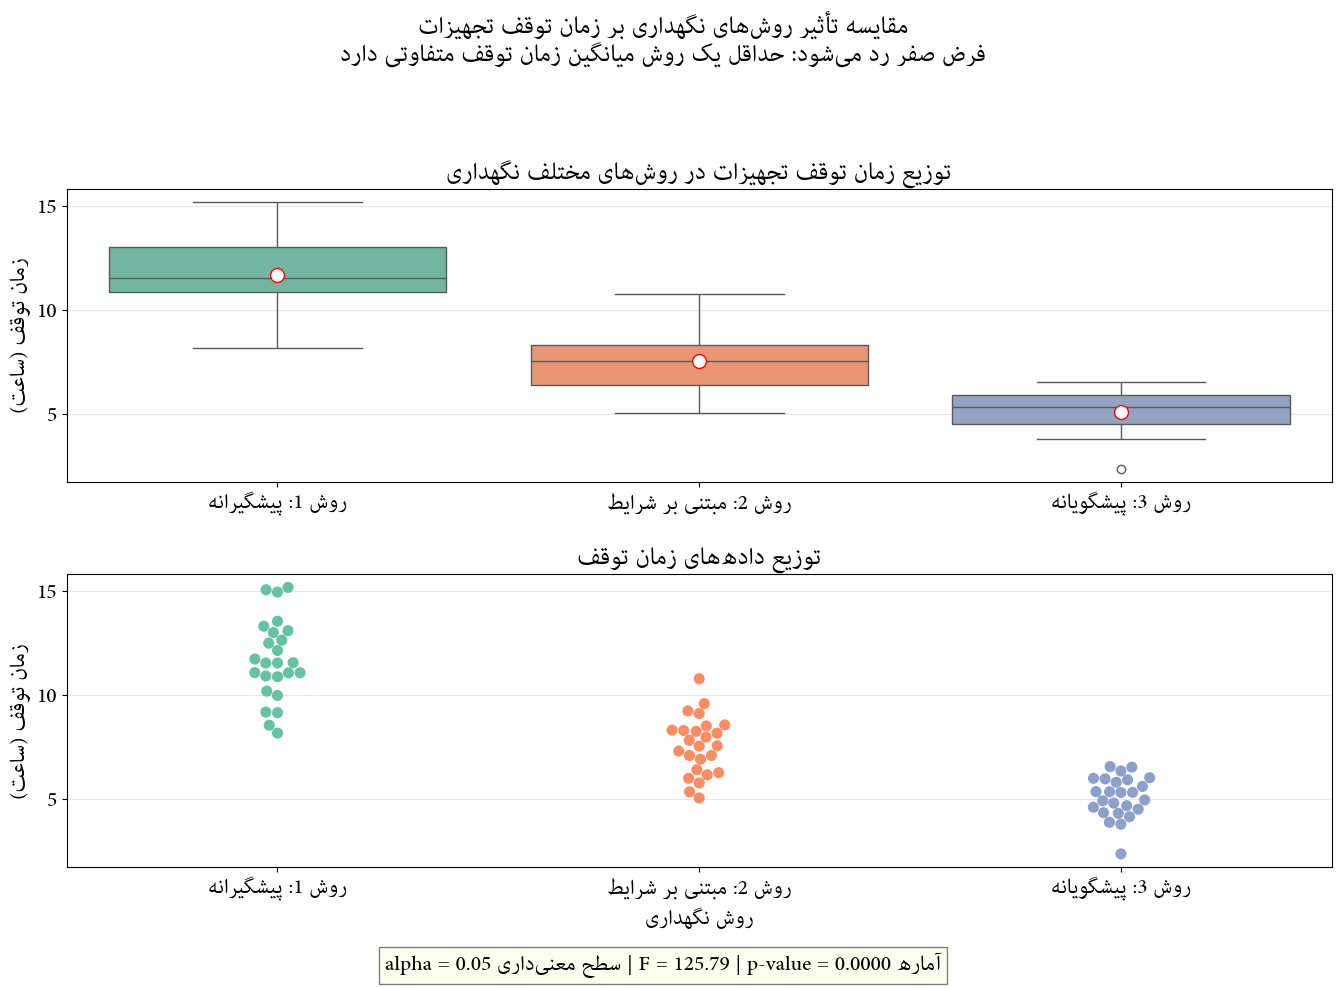


آزمون تعقیبی Tukey HSD:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Method1 Method2  -4.1041   0.0 -5.1052 -3.1031   True
Method1 Method3  -6.5669   0.0  -7.568 -5.5658   True
Method2 Method3  -2.4627   0.0 -3.4638 -1.4617   True
-----------------------------------------------------

نتایج آزمون Tukey HSD:
                  گروه 1                 گروه 2  تفاوت میانگین  \
0       روش 1: پیشگیرانه  روش 2: مبتنی بر شرایط        -4.1041   
1       روش 1: پیشگیرانه       روش 3: پیشگویانه        -6.5669   
2  روش 2: مبتنی بر شرایط       روش 3: پیشگویانه        -2.4627   

   فاصله اطمینان پایین  فاصله اطمینان بالا  p-value  معنی‌دار؟  
0                  0.0             -5.1052  -3.1031       True  
1                  0.0             -7.5680  -5.5658       True  
2                  0.0             -3.4638  -1.4617       True  

تحلیل نتایج آزمون Tukey:
→ تفاوت معنی‌دار بین ر

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# 1. تنظیم فرضیه‌ها
# فرض صفر (H0): میانگین زمان توقف در سه روش نگهداری برابر است (μ1 = μ2 = μ3)
# فرض مقابل (H1): حداقل یک روش میانگین زمان توقف متفاوتی دارد
# یکطرفه ANOVA آزمون

# پارامترهای آزمون
alpha = 0.05  # سطح معنی‌داری

# 2. تولید داده‌های نمونه برای سه روش نگهداری
np.random.seed(42)  # برای تکرارپذیری نتایج

# روش 1: نگهداری پیشگیرانه سنتی
mean_1 = 12  # میانگین زمان توقف (ساعت)
std_1 = 2    # انحراف معیار
n_1 = 25     # تعداد نمونه‌ها
method_1 = np.random.normal(mean_1, std_1, n_1)

# روش 2: نگهداری مبتنی بر شرایط
mean_2 = 8   # میانگین زمان توقف (ساعت)
std_2 = 1.5  # انحراف معیار
n_2 = 25     # تعداد نمونه‌ها
method_2 = np.random.normal(mean_2, std_2, n_2)

# IoT روش 3: نگهداری پیشگویانه با 
mean_3 = 5   # میانگین زمان توقف (ساعت)
std_3 = 1    # انحراف معیار
n_3 = 25     # تعداد نمونه‌ها
method_3 = np.random.normal(mean_3, std_3, n_3)

# محاسبه آماره‌های نمونه
print("روش 1 (نگهداری پیشگیرانه):")
print(f"→ میانگین: {np.mean(method_1):.2f} ساعت, انحراف معیار: {np.std(method_1, ddof=1):.2f}")

print("\nروش 2 (نگهداری مبتنی بر شرایط):")
print(f"→ میانگین: {np.mean(method_2):.2f} ساعت, انحراف معیار: {np.std(method_2, ddof=1):.2f}")

print("\nروش 3 (نگهداری پیشگویانه):")
print(f"→ میانگین: {np.mean(method_3):.2f} ساعت, انحراف معیار: {np.std(method_3, ddof=1):.2f}")

# 3. انجام آزمون ANOVA یک طرفه
f_stat, p_value = stats.f_oneway(method_1, method_2, method_3)
print(f"\nآزمون ANOVA:")
print(f"→ آماره F: {f_stat:.4f}")
print(f"→ p-value: {p_value:.4f}")

# 4. تصمیم‌گیری
if p_value < alpha:
    result = "فرض صفر رد می‌شود: حداقل یک روش میانگین زمان توقف متفاوتی دارد"
    # انجام آزمون تعقیبی Tukey HSD
    tukey_needed = True
else:
    result = "فرض صفر رد نمی‌شود: تفاوت معنی‌داری بین میانگین زمان توقف روش‌ها وجود ندارد"
    tukey_needed = False

# 5. تجسم نتایج
plt.figure(figsize=(14, 10))
plt.rcParams['font.family'] = 'Adobe Arabic'
plt.rcParams['font.size'] = 21
plt.rcParams['axes.unicode_minus'] = False  # برای نمایش صحیح علامت منفی

# ایجاد DataFrame برای داده‌ها
data = pd.DataFrame({
    'زمان توقف (ساعت)': np.concatenate([method_1, method_2, method_3]),
    'روش نگهداری': 
        [bidi_text('روش 1: پیشگیرانه')] * n_1 + 
        [bidi_text('روش 2: مبتنی بر شرایط')] * n_2 + 
        [bidi_text('روش 3: پیشگویانه')] * n_3
})

# نمودار جعبه‌ای
plt.subplot(2, 1, 1)
sns.boxplot(
    x='روش نگهداری', 
    y='زمان توقف (ساعت)', 
    data=data,
    palette='Set2',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'red', 'markersize':'10'}
)
plt.title(bidi_text('توزیع زمان توقف تجهیزات در روش‌های مختلف نگهداری'), fontsize=24)
plt.xlabel('')
plt.ylabel(bidi_text('زمان توقف (ساعت)'), fontsize=21)
plt.grid(axis='y', alpha=0.3)

# نمودار شاخه‌ای (Swarm plot)
plt.subplot(2, 1, 2)
sns.swarmplot(
    x='روش نگهداری', 
    y='زمان توقف (ساعت)', 
    data=data,
    palette='Set2',
    size=8
)
plt.title(bidi_text('توزیع داده‌های زمان توقف'), fontsize=24)
plt.xlabel(bidi_text('روش نگهداری'), fontsize=21)
plt.ylabel(bidi_text('زمان توقف (ساعت)'), fontsize=21)
plt.grid(axis='y', alpha=0.3)

# افزودن عنوان اصلی و اطلاعات آماری
plt.suptitle(bidi_text(f'مقایسه تأثیر روش‌های نگهداری بر زمان توقف تجهیزات\n{result}'), fontsize=24, y=0.98)

info_text = bidi_text(f'آماره F = {f_stat:.2f} | p-value = {p_value:.4f} | سطح معنی‌داری alpha = {alpha}')

plt.figtext(
    0.5, 0.02, 
    info_text,
    ha='center', 
    fontsize=21, 
    bbox=dict(facecolor='lightyellow', alpha=0.5)
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('maintenance_methods_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
# 6. آزمون تعقیبی Tukey HSD (اگر ANOVA معنی‌دار بود)
if tukey_needed:
    print("\n" + "="*50)
    print("آزمون تعقیبی Tukey HSD:")
    print("="*50)
    
    # آماده‌سازی داده‌ها برای Tukey HSD
    tukey_data = pd.DataFrame({
        'values': np.concatenate([method_1, method_2, method_3]),
        'groups': 
            ['Method1'] * n_1 + 
            ['Method2'] * n_2 + 
            ['Method3'] * n_3
    })
    
    # انجام آزمون Tukey
    tukey_results = pairwise_tukeyhsd(
        endog=tukey_data['values'],
        groups=tukey_data['groups'],
        alpha=alpha
    )
    
    # نمایش نتایج به صورت جدول
    print(tukey_results)
    
    # تبدیل نتایج به DataFrame برای نمایش بهتر
    tukey_summary = tukey_results.summary()
    tukey_df = pd.DataFrame(tukey_summary.data[1:], columns=tukey_summary.data[0])
    
    #  ستون‌ها
    tukey_df.columns = [
        'گروه 1',
        'گروه 2',
        'تفاوت میانگین',
        'فاصله اطمینان پایین',
        'فاصله اطمینان بالا',
        'p-value',
        'معنی‌دار؟'
    ]
    
    #  نام گروه‌ها
    group_names = {
        'Method1': 'روش 1: پیشگیرانه',
        'Method2': 'روش 2: مبتنی بر شرایط',
        'Method3': 'روش 3: پیشگویانه'
    }
    
    tukey_df['گروه 1'] = tukey_df['گروه 1'].map(group_names)
    tukey_df['گروه 2'] = tukey_df['گروه 2'].map(group_names)
    
    # نمایش جدول
    print("\n" + "نتایج آزمون Tukey HSD:")
    print(tukey_df)
    
    # تحلیل نتایج
    print("\n" + "تحلیل نتایج آزمون Tukey:")
    for index, row in tukey_df.iterrows():
        group1 = row['گروه 1']
        group2 = row['گروه 2']
        p_val = float(row['p-value'])
        
        if p_val < alpha:
            print(f"→ تفاوت معنی‌دار بین {group1} و {group2} وجود دارد (p-value = {p_val:.4f})")
        else:
            print(f"→ تفاوت معنی‌دار بین {group1} و {group2} وجود ندارد (p-value = {p_val:.4f})")

# 7. تحلیل اقتصادی
cost_per_hour = 5000  # دلار هزینه هر ساعت توقف
print("\n" + "="*50)
print(":تحلیل اقتصادی")
print("="*50)
print("هزینه سالانه توقف تجهیزات (بر اساس 365 روز کاری):")

methods = {
    'روش 1: پیشگیرانه': method_1,
    'روش 2: مبتنی بر شرایط': method_2,
    'روش 3: پیشگویانه': method_3
}

for method_name, data in methods.items():
    mean_downtime = np.mean(data)
    annual_cost = mean_downtime * 365 * cost_per_hour
    print(f"→ {method_name}:")
    print(f"  - میانگین زمان توقف روزانه: {mean_downtime:.2f} ساعت")
    print(f"  - هزینه سالانه: ${annual_cost:,.2f}")

# مقایسه هزینه‌ها
if tukey_needed:
    best_method = min(methods, key=lambda k: np.mean(methods[k]))
    worst_method = max(methods, key=lambda k: np.mean(methods[k]))
    
    best_cost = np.mean(methods[best_method]) * 365 * cost_per_hour
    worst_cost = np.mean(methods[worst_method]) * 365 * cost_per_hour
    savings = worst_cost - best_cost
    
    print("\n" + ":مقایسه اقتصادی")
    print(f"→ بهینه‌ترین روش: {best_method}")
    print(f"→ صرفه‌جویی سالانه نسبت به بدترین روش ({worst_method}): ${savings:,.2f}")
    print("→ اجرای روش بهینه می‌تواند صرفه‌جویی قابل توجهی ایجاد کند")